## NWAY with cross-catalog priors


This demonstrates a prior on properties across catalogs. In this example, we make sure the chosen association has consistent magnitudes (+-0.3mag) in similar bands, and not completely different magnitudes.

This example is very artificial. It assumes positional errors of 100 arcsec. If you have a better example, let me (Johannes) know.

In [43]:
import numpy
import numpy as np
from numpy import log10, pi, exp, logical_and
import astropy.io.fits as pyfits
import nwaylib
import matplotlib.pyplot as plt

# load catalogs

t1 = pyfits.open('standard-stars.fits')[1]
t2 = pyfits.open('gaia.fits')[1]

# prepare for NWAY API
c1 = dict(name='STD', area=pi * 15**2, 
          ra=t1.data['RA'], dec=t1.data['DEC'], error=t1.data['RA'] * 0 + 100, 
          mags=[], maghists=[], magnames=[])
c2 = dict(name='GAIA', area=15**2, 
          ra=t2.data['RA'], dec=t2.data['DEC'], error=t2.data['RA'] * 0 + 100, 
          mags=[], maghists=[], magnames=[])


First, we just look at the naive match using only positions.

In [44]:
result_pos = nwaylib.nway_match([c1, c2], match_radius=1000, prior_completeness = 0.9)

    adding angular separation columns
matching:    311 matches after filtering by search radius
Primary catalogue "STD" (39), density gives 2.28e+03 objects on entire sky
Catalogue "GAIA" (15305), density gives 2.81e+06 objects on entire sky
Computing distance-based probabilities ...
    correcting for unrelated associations ...
100%|██████████| 39/39 [00:00<00:00, 3547.17it/s]

Computing final probabilities ...
    grouping by primary catalogue ID and flagging ...


In [3]:
result_pos

,STD,GAIA,Separation_STD_GAIA,Separation_max,ncat,dist_bayesfactor_uncorrected,dist_bayesfactor,dist_post,p_single,match_flag,prob_has_match,prob_this_match
0,0,-1,NaN,0.000000,1,0.000000,0.000000,1.000000e+00,1.000000e+00,0,0.57848,0.000000e+00
1,0,530,0.922967,0.922967,2,6.628841,6.628841,5.770640e-01,5.770640e-01,1,0.57848,9.942118e-01
2,0,3526,523.724525,523.724525,2,3.650813,3.650813,1.433172e-03,1.433172e-03,0,0.57848,1.045805e-03
3,0,12678,622.818627,622.818627,2,2.417246,2.417246,8.381436e-05,8.381436e-05,0,0.57848,6.107794e-05
4,0,13917,462.963721,462.963721,2,4.301733,4.301733,6.383521e-03,6.383521e-03,0,0.57848,4.681349e-03
...,...,...,...,...,...,...,...,...,...,...,...,...
306,38,167,1.700956,1.700956,2,6.628819,6.628819,5.770516e-01,5.770516e-01,1,0.70056,5.831656e-01
307,38,2107,785.453741,785.453741,2,-0.069464,-0.069464,2.733026e-07,2.733026e-07,0,0.70056,1.168177e-07
308,38,8918,690.145449,690.145449,2,1.457481,1.457481,9.195705e-06,9.195705e-06,0,0.70056,3.930554e-06
309,38,9524,827.906988,827.906988,2,-0.813111,-0.813111,4.931705e-08,4.931705e-08,0,0.70056,2.107958e-08


While many sources found a counterpart ($p_{any}$>0.5), there are many options ($p_i$<0.5) for many sources:

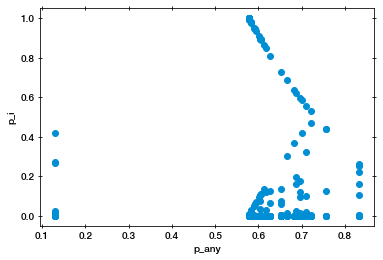

In [42]:
plt.scatter(result_pos.prob_has_match, result_pos.prob_this_match)
plt.ylabel('p_i')
plt.xlabel('p_any');

Lets look at the magnitudes from the two input catalogs, and see whether they are correlated!

In [47]:
mag_O = t1.data['HPmag'][result_pos.STD[result_pos.ncat>1]]
mag_G = t2.data['phot_g_mean_mag'][result_pos.GAIA[result_pos.ncat>1]]

In [48]:
mag_O

array([6.88, 6.88, 6.88, 6.88, 6.02, 6.02, 6.02, 6.02, 6.02, 6.02, 6.02,
       6.02, 6.02, 6.02, 6.02, 6.44, 6.44, 6.44, 6.44, 6.44, 6.44, 6.44,
       6.44, 6.44, 6.44, 6.44, 6.44, 5.11, 5.11, 5.11, 5.11, 5.11, 5.11,
       5.11, 5.11, 3.72, 3.72, 3.72, 3.72, 3.72, 3.72, 3.72, 3.72, 3.72,
       3.72, 3.72, 3.72, 3.72, 3.72, 3.72, 3.72, 3.72, 5.26, 5.26, 5.26,
       5.26, 5.26, 5.26, 5.26, 5.26, 3.76, 3.76, 3.76, 3.76, 6.13, 6.13,
       6.13, 6.43, 6.43, 6.43, 6.43, 6.43, 6.43, 2.27, 2.27, 2.27, 2.27,
       2.27, 6.  , 6.  , 6.  , 6.  , 6.  , 6.  , 5.02, 5.02, 5.02, 5.02,
       5.02, 5.02, 5.02, 5.02, 6.36, 6.36, 6.36, 6.36, 6.36, 2.22, 2.22,
       2.22, 2.22, 2.22, 2.22, 2.22, 2.22, 2.22, 2.22, 2.22, 6.31, 6.31,
       6.31, 6.31, 6.31, 6.31, 6.31, 6.31, 6.31, 6.31, 6.31, 6.31, 6.31,
       6.31, 6.31, 6.31, 6.31, 6.31, 6.31, 6.31, 4.43, 4.43, 4.43, 4.43,
       4.43, 4.43, 6.6 , 6.6 , 6.6 , 6.6 , 6.6 , 6.6 , 6.6 , 6.6 , 6.6 ,
       6.8 , 6.8 , 6.8 , 6.8 , 4.94, 4.94, 4.94, 4.

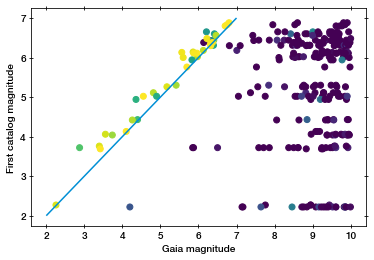

In [50]:
plt.scatter(mag_G, mag_O, c=result_pos.prob_this_match[result_pos.ncat>1])
plt.ylabel('First catalog magnitude')
plt.xlabel('Gaia magnitude')
plt.plot([2, 7], [2, 7]);

Indeed, they are correlated! ^

Lets look at the difference distribution:

0.3378309


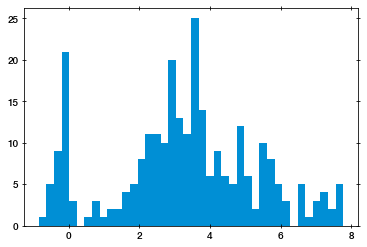

In [51]:
plt.hist(mag_G - mag_O, bins=40);
print((mag_G - mag_O)[np.abs(mag_G - mag_O) < 1].std())

There is a large tail of wrong association, but there is a peak near zero +- 0.3.

To discard the tail, lets build a prior that prefers magnitude differences following a gaussian with standard deviation of 0.3:

In [11]:
# allowed deviation
sigma = 0.3

This is our function which postprocesses a NWAY match, by weighing each combination:

Have a look at the comments!

In [56]:
def apply_magdiff_biasing(match_tables, table, mag_include_radius, mag_exclude_radius, magauto_post_single_minvalue, store_mag_hists, logger):
    # get the O magnitudes
    mag_O = t1.data['HPmag'][table.STD]
    table['HPmag'] = mag_O
    has_match = table.ncat == 2
    # get the Gaia magnitudes
    mag_G = t2.data['phot_g_mean_mag'][table.GAIA]
    mag_G[~has_match] = np.nan
    table['phot_g_mean_mag'] = mag_G
    # compute difference
    magdiff = mag_O - mag_G
    # compute probability of being a target using a gaussian:
    prob_correlated = np.exp(-0.5 * (magdiff / sigma)**2) / (2 * pi * sigma**2)
    # compute probability of unrelated using two flat distributions in magnitude [0..10]
    prob_unrelated = 1. / (10 * 10)
    # new Bayes factor:
    newbf = np.log(prob_correlated + 1e-10) - np.log(prob_unrelated)
    # store information into the output
    table['bias_magdiff'] = np.where(np.isfinite(newbf), np.exp(newbf), 0)
    
    # update values and return them
    total = table['dist_bayesfactor'].values + table['bias_magdiff'].values
    return table, total


## Final NWAY run

Now we run NWAY **with** this fancy biasing function.

NWAY will do the same, but finally recompute the $p_{any}$ and $p_i$ values incorporating our Bayes factor.


In [58]:
result = nwaylib.nway_match(
    [c1, c2], 
    match_radius=100, 
    prior_completeness = 0.9, 
    biasing_function=apply_magdiff_biasing  # <-- This line is new!
)

    adding angular separation columns
matching:     81 matches after filtering by search radius
Primary catalogue "STD" (39), density gives 2.28e+03 objects on entire sky
Catalogue "GAIA" (15305), density gives 2.81e+06 objects on entire sky
Computing distance-based probabilities ...
    correcting for unrelated associations ...
100%|██████████| 39/39 [00:00<00:00, 3687.26it/s]

Computing final probabilities ...
    grouping by primary catalogue ID and flagging ...


In [59]:
result

,STD,GAIA,Separation_STD_GAIA,Separation_max,ncat,dist_bayesfactor_uncorrected,dist_bayesfactor,dist_post,HPmag,phot_g_mean_mag,bias_magdiff,p_single,match_flag,prob_has_match,prob_this_match
0,0,-1,NaN,0.000000,1,0.000000,0.000000,1.000000,6.88,NaN,0.000000,1.0,0,1.0,0.0
1,0,530,0.922967,0.922967,2,6.628841,6.628841,0.577064,6.88,6.802691,171.063538,1.0,1,1.0,1.0
2,1,-1,NaN,0.000000,1,0.000000,0.000000,1.000000,6.02,NaN,0.000000,1.0,0,1.0,0.0
3,1,198,0.683928,0.683928,2,6.628845,6.628845,0.577066,6.02,5.972343,174.621536,1.0,1,1.0,1.0
4,2,-1,NaN,0.000000,1,0.000000,0.000000,1.000000,6.44,NaN,0.000000,1.0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,36,-1,NaN,0.000000,1,0.000000,0.000000,1.000000,3.69,NaN,0.000000,1.0,0,1.0,0.0
77,36,5,0.521587,0.521587,2,6.628847,6.628847,0.577068,3.69,3.418618,117.458061,1.0,1,1.0,1.0
78,37,-1,NaN,0.000000,1,0.000000,0.000000,1.000000,2.22,NaN,0.000000,1.0,1,0.0,0.0
79,38,-1,NaN,0.000000,1,0.000000,0.000000,1.000000,5.94,NaN,0.000000,1.0,0,1.0,0.0


Lets look at the new magnitude correlation, color-coded by $p_i$:

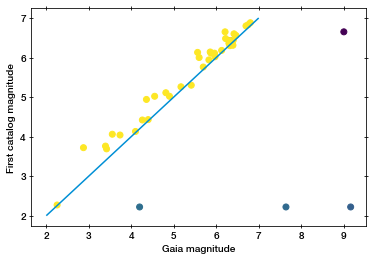

In [60]:
plt.scatter(result.phot_g_mean_mag, result.HPmag, c=result.prob_this_match);
plt.ylabel('First catalog magnitude')
plt.xlabel('Gaia magnitude')
plt.plot([2, 7], [2, 7]);

Now, the $p_i$ is very high close to the line, as we wanted.

Finally, lets look how the $p_i$ - $p_{any}$ distribution changed:

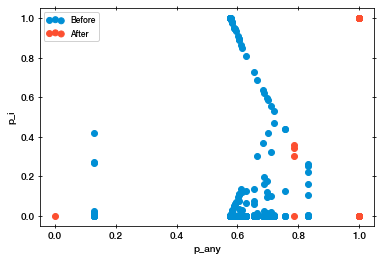

In [62]:
plt.scatter(result_pos.prob_has_match, result_pos.prob_this_match, label='Before');
plt.scatter(result.prob_has_match, result.prob_this_match, label='After')
plt.legend(loc='best')
plt.ylabel('p_i')
plt.xlabel('p_any');

There are fewer ambiguous cases with intermediate $p_{any}$ and $p_i$.